In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlmicrophysics.models import DenseNeuralNetwork
from sklearn.ensemble import RandomForestClassifier
from mlmicrophysics.data import subset_data_files_by_date, log10_transform, neg_log10_transform
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler, MinMaxScaler
from sklearn.metrics import r2_score, confusion_matrix, mean_squared_error
from matplotlib.colors import LogNorm
scalers = {"MinMaxScaler": MinMaxScaler,
           "MaxAbsScaler": MaxAbsScaler,
           "StandardScaler": StandardScaler,
           "RobustScaler": RobustScaler}
transforms = {"log10_transform": log10_transform,
              "neg_log10_transform": neg_log10_transform}

In [2]:
#path = "/glade/scratch/dgagne/cam_mp_files_run2_csv/"
path = "/Users/dgagne/data/cam_mp_files_run2_csv/"
train_files, val_files, test_files = subset_data_files_by_date(path, ".csv", train_date_start=0, train_date_end=4000, 
                                                               test_date_start=4100, test_date_end=6000)

[    0   123   246   369   492   615   738   861   984  1107  1230  1353
  1476  1599  1722  1845  1968  2091  2214  2337  2460  2583  2706  2829
  2952  3075  3198  3321  3444  3567  3690  3813  3936  4059  4182  4305
  4428  4551  4674  4797  4920  5043  5166  5289  5412  5535  5658  5781
  5904  6027  6150  6273  6396  6519  6642  6765  6888  7011  7134  7257
  7380  7503  7626  7749  7872  7995  8118  8241  8364  8487  8610  8733
  8856  8979  9102  9225  9348  9471  9594  9717  9840  9963 10086 10209
 10332 10455 10578 10701 10824 10947 11070 11193 11316 11439 11562 11685
 11808 11931 12054 12177 12300 12423 12546 12669 12792 12915 13038 13161
 13284 13407 13530 13653 13776 13899 14022 14145 14268 14391 14514 14637
 14760 14883 15006 15129 15252 15375 15498 15621 15744 15867 15990 16113
 16236 16359 16482 16605 16728 16851 16974 17097 17220 17343 17466]


In [3]:
input_cols = ["pressure", "temperature", "RHO_CLUBB_lev", "RHO_CLUBB_top", "RHO_CLUBB_bottom",
             "QC_TAU_in", "NC_TAU_in", "QR_TAU_in", "NR_TAU_in",]
output_cols = ["qctend_TAU", "qrtend_TAU", "nctend_TAU", "nrtend_TAU"]
all_input_data = []
all_output_data = []
for filename in train_files:
    print(filename)
    data = pd.read_csv(filename, index_col="Index")
    data = data.loc[data["NC_TAU_in"] >= 10]
    all_input_data.append(data[input_cols])
    all_output_data.append(data[output_cols])
    del data
print("Combining data")
combined_input_data = pd.concat(all_input_data, ignore_index=True)
combined_output_data = pd.concat(all_output_data, ignore_index=True)
del all_input_data[:]
del all_output_data[:]

/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_000123.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_000246.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_000492.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_000615.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_000861.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_000984.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_001230.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_001353.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_001599.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_001722.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_001968.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_002091.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_002337.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_002460.csv
/Users/dgagne/data/cam_mp_files_ru

In [4]:
all_input_data = []
all_output_data = []
for filename in test_files:
    print(filename)
    data = pd.read_csv(filename, index_col="Index")
    data = data.loc[data["NC_TAU_in"] >= 10]
    all_input_data.append(data[input_cols])
    all_output_data.append(data[output_cols])
    del data
print("Combining data")
test_input_data = pd.concat(all_input_data, ignore_index=True)
test_output_data = pd.concat(all_output_data, ignore_index=True)
del all_input_data[:]
del all_output_data[:]

/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_004182.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_004305.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_004428.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_004551.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_004674.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_004797.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_004920.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_005043.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_005166.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_005289.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_005412.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_005535.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_005658.csv
/Users/dgagne/data/cam_mp_files_run2_csv/cam_mp_data_run2_005781.csv
/Users/dgagne/data/cam_mp_files_ru

(array([[nan, nan,  1., ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([1.00025394, 1.0806814 , 1.16110885, 1.24153631, 1.32196376,
        1.40239122, 1.48281867, 1.56324613, 1.64367358, 1.72410104,
        1.80452849, 1.88495595, 1.9653834 , 2.04581086, 2.12623831,
        2.20666577, 2.28709322, 2.36752068, 2.44794813, 2.52837559,
        2.60880304, 2.6892305 , 2.76965795, 2.85008541, 2.93051286,
        3.01094032, 3.09136777, 3.17179523, 3.25222268, 3.33265014,
        3.41307759, 3.49350505, 3.5739325 , 3.65435996, 3.73478741,
        3.81521487, 3.89564232, 3.97606978, 4.05649723, 4.13692469,
        4.21735214, 4.2977796 , 4.37820705, 4.45863451, 4.53906196,
        4.61948942, 4.69991687, 4.78034433, 4.86077178, 4.94119924,
        5.02162669, 5.10205415, 5.1

/Users/dgagne/miniconda3/envs/deep/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


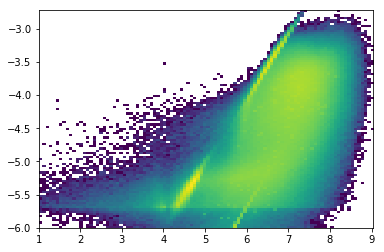

In [6]:
plt.hist2d(np.log10(combined_input_data["NC_TAU_in"]), np.log10(combined_input_data["QC_TAU_in"]), 
           bins=100, cmin=1, norm=LogNorm() )

In [66]:
del dnn, dnn_qr, dnn_nc, dnn_nr

In [5]:
dnn_qr = DenseNeuralNetwork(hidden_layers=4, hidden_neurons=50, 
                         inputs=len(input_cols), outputs=1, 
                         loss="mse", activation="selu", epochs=10, 
                         batch_size=2048, verbose=1, l2_weight=0.0001, lr=0.0001)
dnn_nc = DenseNeuralNetwork(hidden_layers=4, hidden_neurons=50, 
                         inputs=len(input_cols), outputs=1, 
                         loss="mse", activation="selu", epochs=10, 
                         batch_size=2048, verbose=1, l2_weight=0.0001, lr=0.0001)
dnn_nr = DenseNeuralNetwork(hidden_layers=4, hidden_neurons=50, 
                         inputs=len(input_cols), outputs=1, 
                         loss="mse", activation="selu", epochs=10, 
                         batch_size=2048, verbose=1, l2_weight=0.0001, lr=0.0001)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 9)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                500       
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_3 (Activation)    (None, 50)                0         
__________

In [6]:
input_transforms = {
    "QC_TAU_in": "log10_transform",
    "NC_TAU_in": "log10_transform",
    "QR_TAU_in": "log10_transform",
    "NR_TAU_in": "log10_transform"}

for var, transform_name in input_transforms.items():
    combined_input_data.loc[:, var] = transforms[transform_name](combined_input_data[var])


In [7]:
for var, transform_name in input_transforms.items():
    test_input_data.loc[:, var] = transforms[transform_name](test_input_data[var])

In [8]:
scaler = StandardScaler()
scaled_input_data = scaler.fit_transform(combined_input_data)

In [13]:
scaled_test_input = scaler.transform(test_input_data)

In [26]:
combined_output_data.columns

Index(['qctend_TAU', 'qrtend_TAU', 'nctend_TAU', 'nrtend_TAU'], dtype='object')

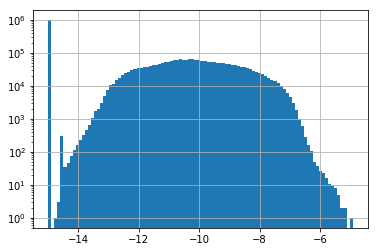

In [33]:
np.log10(np.maximum(1e-15, combined_output_data["qrtend_TAU"])).hist(bins=100)
plt.gca().set_yscale("log")

In [9]:
dnn_qr.fit(scaled_input_data, np.log10(np.maximum(1e-15, combined_output_data.iloc[:, 1])))

Epoch 1/10
3244665/3244665 [==============================] - 16s 5us/step - loss: 2.5342
Epoch 2/10
3244665/3244665 [==============================] - 16s 5us/step - loss: 0.4119
Epoch 3/10
3244665/3244665 [==============================] - 15s 5us/step - loss: 0.3470
Epoch 4/10
3244665/3244665 [==============================] - 13s 4us/step - loss: 0.3201
Epoch 5/10
3244665/3244665 [==============================] - 13s 4us/step - loss: 0.3040
Epoch 6/10
3244665/3244665 [==============================] - 13s 4us/step - loss: 0.2936
Epoch 7/10
3244665/3244665 [==============================] - 13s 4us/step - loss: 0.2855
Epoch 8/10
3244665/3244665 [==============================] - 14s 4us/step - loss: 0.2787
Epoch 9/10
3244665/3244665 [==============================] - 14s 4us/step - loss: 0.2747
Epoch 10/10
3244665/3244665 [==============================] - 15s 4us/step - loss: 0.2702


In [10]:
dnn_nc.fit(scaled_input_data, np.log10(np.maximum(-combined_output_data.iloc[:, 2], 1e-15)))

Epoch 1/10
3244665/3244665 [==============================] - 14s 4us/step - loss: 0.0650
Epoch 2/10
3244665/3244665 [==============================] - 14s 4us/step - loss: 0.0278
Epoch 3/10
3244665/3244665 [==============================] - 14s 4us/step - loss: 0.0244
Epoch 4/10
3244665/3244665 [==============================] - 14s 4us/step - loss: 0.0219
Epoch 5/10
3244665/3244665 [==============================] - 14s 4us/step - loss: 0.0201
Epoch 6/10
3244665/3244665 [==============================] - 14s 4us/step - loss: 0.0187
Epoch 7/10
3244665/3244665 [==============================] - 14s 4us/step - loss: 0.0178
Epoch 8/10
3244665/3244665 [==============================] - 14s 4us/step - loss: 0.0169
Epoch 9/10
3244665/3244665 [==============================] - 14s 4us/step - loss: 0.0163
Epoch 10/10
3244665/3244665 [==============================] - 14s 4us/step - loss: 0.0158


In [70]:
nr_scaler = StandardScaler()
scaled_nr = nr_scaler.fit_transform(combined_output_data.iloc[:, 3:4])
print(scaled_nr.shape)
dnn_nr.fit(scaled_input_data, scaled_nr)

(3244665, 1)
Epoch 1/10
3244665/3244665 [==============================] - 15s 5us/step - loss: 0.9222
Epoch 2/10
3244665/3244665 [==============================] - 14s 4us/step - loss: 0.8161
Epoch 3/10
3244665/3244665 [==============================] - 13s 4us/step - loss: 0.7735
Epoch 4/10
3244665/3244665 [==============================] - 14s 4us/step - loss: 0.7309
Epoch 5/10
3244665/3244665 [==============================] - 13s 4us/step - loss: 0.8138
Epoch 6/10
3244665/3244665 [==============================] - 13s 4us/step - loss: 0.7693
Epoch 7/10
3244665/3244665 [==============================] - 13s 4us/step - loss: 0.7562
Epoch 8/10
3244665/3244665 [==============================] - 13s 4us/step - loss: 0.7182
Epoch 9/10
3244665/3244665 [==============================] - 13s 4us/step - loss: 0.8243
Epoch 10/10
3244665/3244665 [==============================] - 13s 4us/step - loss: 0.7173


In [11]:
nr_classifier = RandomForestClassifier(n_estimators=50, n_jobs=4, max_features="sqrt",
                                       verbose=1, class_weight="balanced_subsample")
nr_labels = np.zeros(combined_output_data.iloc[:, 3].shape, dtype=int)
nr_labels[combined_output_data.iloc[:, 3] > 0] = 1
nr_labels[combined_output_data.iloc[:, 3] < 0] = -1
subset = np.random.permutation(np.arange(0, nr_labels.shape[0]))[:100000]
nr_classifier.fit(scaled_input_data[subset], nr_labels[subset])

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    4.5s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=4, oob_score=False, random_state=None,
            verbose=1, warm_start=False)

In [14]:
test_nr_sign = nr_classifier.predict(scaled_test_input)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    5.3s finished


In [15]:
test_nr_labels = np.zeros(test_output_data.iloc[:, 3].shape, dtype=int)
test_nr_labels[test_output_data.iloc[:, 3] > 0] = 1
test_nr_labels[test_output_data.iloc[:, 3] < 0] = -1
confusion_matrix(test_nr_labels, test_nr_sign)

array([[ 436442,    1415,   30544],
       [   1579,  622743,   24862],
       [  21476,   59223, 1227903]])

In [16]:
nr_pos_net = DenseNeuralNetwork(hidden_layers=3, hidden_neurons=50, 
                         inputs=len(input_cols), outputs=1, 
                         loss="mse", activation="selu", epochs=10, 
                         batch_size=2048, verbose=1, l2_weight=0.0001, lr=0.0001)
nr_neg_net = DenseNeuralNetwork(hidden_layers=3, hidden_neurons=50, 
                         inputs=len(input_cols), outputs=1, 
                         loss="mse", activation="selu", epochs=10, 
                         batch_size=2048, verbose=1, l2_weight=0.0001, lr=0.0001)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 9)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 50)                500       
_________________________________________________________________
activation_13 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_14 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_15 (Activation)   (None, 50)                0         
__________

In [17]:
pos_sub = combined_output_data.iloc[:, 3] > 0
neg_sub = combined_output_data.iloc[:, 3] < 0
nr_pos_net.fit(scaled_input_data[pos_sub], np.log10(combined_output_data.loc[pos_sub, "nrtend_TAU"]))
nr_neg_net.fit(scaled_input_data[neg_sub], np.log10(-combined_output_data.loc[neg_sub, "nrtend_TAU"]))

Epoch 1/10
1726349/1726349 [==============================] - 6s 4us/step - loss: 0.3993
Epoch 2/10
1726349/1726349 [==============================] - 6s 4us/step - loss: 0.1347
Epoch 3/10
1726349/1726349 [==============================] - 6s 4us/step - loss: 0.1164
Epoch 4/10
1726349/1726349 [==============================] - 6s 4us/step - loss: 0.1102
Epoch 5/10
1726349/1726349 [==============================] - 7s 4us/step - loss: 0.1073
Epoch 6/10
1726349/1726349 [==============================] - 6s 4us/step - loss: 0.1042
Epoch 7/10
1726349/1726349 [==============================] - 6s 3us/step - loss: 0.1022
Epoch 8/10
1726349/1726349 [==============================] - 6s 3us/step - loss: 0.1005
Epoch 9/10
1726349/1726349 [==============================] - 6s 3us/step - loss: 0.0990
Epoch 10/10
1726349/1726349 [==============================] - 5s 3us/step - loss: 0.0977
Epoch 1/10
554222/554222 [==============================] - 2s 3us/step - loss: 2.5766
Epoch 2/10
554222/5542

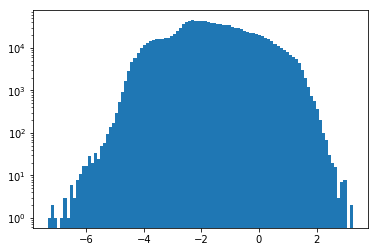

In [118]:
plt.hist(np.log10(test_output_data.loc[test_output_data["nrtend_TAU"] > 0, "nrtend_TAU"]), bins=100)
plt.gca().set_yscale("log")

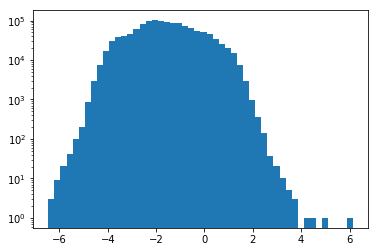

In [116]:
plt.hist(nr_pos_net.predict(scaled_test_input[test_nr_sign > 0]).ravel(), bins=50)
plt.gca().set_yscale("log")

In [18]:
nr_pred_values = np.zeros(scaled_test_input.shape[0])
nr_pred_values[test_nr_sign > 0] = 10 ** nr_pos_net.predict(scaled_test_input[test_nr_sign > 0]).ravel()
nr_pred_values[test_nr_sign < 0] = -10 ** nr_neg_net.predict(scaled_test_input[test_nr_sign < 0]).ravel()

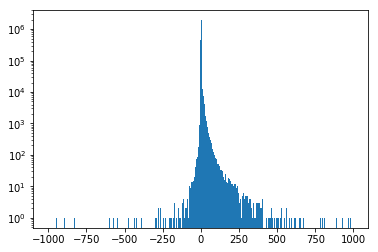

In [119]:
plt.hist(nr_pred_values, bins=np.arange(-1000, 1000, 5))
plt.gca().set_yscale("log")

In [19]:
pred_tendencies = pd.DataFrame(0, index=test_output_data.index, columns=output_cols[1:], dtype=float)
pred_tendencies.loc[:, "qrtend_TAU"] = dnn_qr.predict(scaled_test_input)
pred_tendencies.loc[:, "nctend_TAU"] = dnn_nc.predict(scaled_test_input)
pred_tendencies.loc[:, "nrtend_TAU"] = nr_pred_values


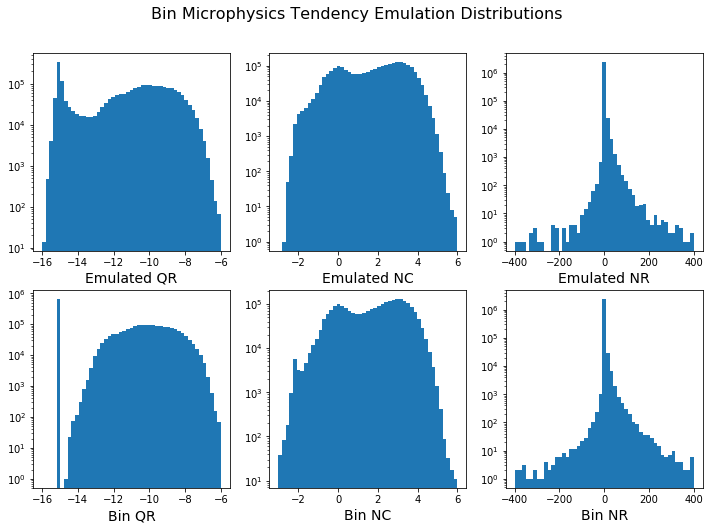

In [43]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
plt.subplots_adjust(wspace=0.2)
all_bins = [np.linspace(-16, -6, 50), np.linspace(-3,6, 50), np.linspace(-400, 400, 50)]
axes[0, 0].hist(pred_tendencies.loc[:, "qrtend_TAU"],
             bins=all_bins[0])
axes[0, 0].set_xlabel("Emulated QR", fontsize=14)
axes[0, 0].set_yscale("log")
axes[0, 1].hist(pred_tendencies.loc[:, "nctend_TAU"], 
            bins=all_bins[1])
axes[0, 1].set_yscale("log")
axes[0, 1].set_xlabel("Emulated NC", fontsize=14)
axes[0, 2].hist(pred_tendencies.loc[:, "nrtend_TAU"], 
             bins=all_bins[2])
axes[0, 2].set_yscale("log")
axes[0, 2].set_xlabel("Emulated NR", fontsize=14)
axes[1, 0].hist(np.log10(np.maximum(1e-15, test_output_data.iloc[:, 1])),
             bins=all_bins[0])
axes[1, 0].set_yscale("log")
axes[1, 0].set_xlabel("Bin QR", fontsize=14)
axes[1, 1].hist(np.log10(np.maximum(1e-15, -test_output_data.iloc[:, 2])), 
            bins=all_bins[1])
axes[1, 1].set_yscale("log")
axes[1, 1].set_xlabel("Bin NC", fontsize=14)
axes[1, 2].hist(test_output_data.iloc[:, 3], 
             bins=all_bins[2])
axes[1, 2].set_yscale("log")
axes[1, 2].set_xlabel("Bin NR", fontsize=14)
fig.suptitle("Bin Microphysics Tendency Emulation Distributions", y=0.96, fontsize=16)
plt.savefig("nn_bin_hist.png", dpi=200, bbox_inches="tight")

In [22]:
nr_scaler.transform(test_output_data.iloc[:, 3:4]).ravel()

NameError: name 'nr_scaler' is not defined

In [31]:
rmses = np.zeros(3)
rmses[0] = np.sqrt(mean_squared_error(np.log10(np.maximum(1e-15, test_output_data.iloc[:, 1])), 
                                      pred_tendencies.loc[:, "qrtend_TAU"]))
rmses[1] = np.sqrt(mean_squared_error(np.log10(np.maximum(1e-15, -test_output_data.iloc[:, 2])), 
                                      pred_tendencies.loc[:, "nctend_TAU"]))
rmses[2] = np.sqrt(mean_squared_error(test_output_data.iloc[:, 3], 
                                      pred_tendencies.loc[:, "nrtend_TAU"]))
r2s = np.zeros(3)
r2s[0] = np.sqrt(r2_score(np.log10(np.maximum(1e-15, test_output_data.iloc[:, 1])), 
                                      pred_tendencies.loc[:, "qrtend_TAU"]))
r2s[1] = np.sqrt(r2_score(np.log10(np.maximum(1e-15, -test_output_data.iloc[:, 2])), 
                                      pred_tendencies.loc[:, "nctend_TAU"]))
r2s[2] = np.sqrt(r2_score(test_output_data.iloc[:, 3], 
                                      pred_tendencies.loc[:, "nrtend_TAU"]))

/Users/dgagne/miniconda3/envs/deep/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


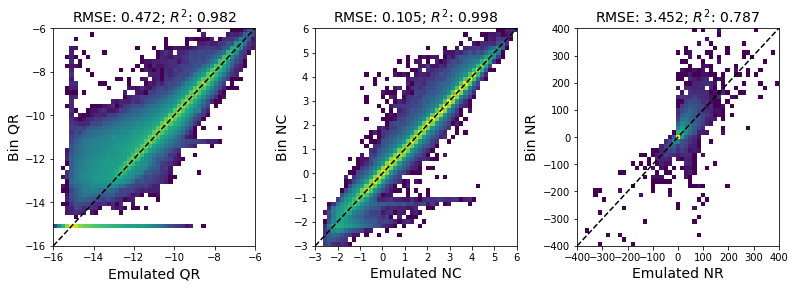

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
plt.subplots_adjust(wspace=0.3)
axes[0].hist2d(pred_tendencies.loc[:, "qrtend_TAU"], 
               np.log10(np.maximum(1e-15, test_output_data.iloc[:, 1])),
               cmin=1, bins=all_bins[0], norm=LogNorm())
axes[0].set_xlabel("Emulated QR", fontsize=14)
axes[0].set_ylabel("Bin QR", fontsize=14)
axes[1].set_xticks(np.arange(-16, 7))
axes[1].set_yticks(np.arange(-16, 7))
axes[0].plot(np.arange(-16, 7),np.arange(-16, 7), 'k--')
axes[0].set_title("RMSE: {0:0.3f}; $R^2$: {1:0.3f}".format(rmses[0], r2s[0]), fontsize=14)
axes[1].hist2d(pred_tendencies.loc[:, "nctend_TAU"], 
               np.log10(np.maximum(1e-15, -test_output_data.iloc[:, 2])),
               cmin=1, bins=all_bins[1], norm=LogNorm())
axes[1].set_xlabel("Emulated NC", fontsize=14)
axes[1].set_ylabel("Bin NC", fontsize=14)
axes[1].set_title("RMSE: {0:0.3f}; $R^2$: {1:0.3f}".format(rmses[1], r2s[1]), fontsize=14)
axes[1].set_xticks(np.arange(-3, 7))
axes[1].set_yticks(np.arange(-3, 7))
axes[1].plot(np.arange(-3, 7),np.arange(-3, 7), 'k--')
axes[2].hist2d(pred_tendencies.loc[:, "nrtend_TAU"], 
               test_output_data.iloc[:, 3],
               cmin=1, bins=all_bins[2], norm=LogNorm())
axes[2].set_xlabel("Emulated NR", fontsize=14)
axes[2].set_ylabel("Bin NR", fontsize=14)
axes[2].set_title("RMSE: {0:0.3f}; $R^2$: {1:0.3f}".format(rmses[2], r2s[2]), fontsize=14)
axes[2].set_xticks(np.arange(-400, 500, 100))
axes[2].set_yticks(np.arange(-400, 500, 100))
axes[2].plot(np.arange(-400, 500, 100),np.arange(-400, 500, 100), 'k--')
plt.savefig("nn_bin_hist2d.png", dpi=200, bbox_inches="tight")

In [47]:
test_input_data.columns

Index(['pressure', 'temperature', 'RHO_CLUBB_lev', 'RHO_CLUBB_top',
       'RHO_CLUBB_bottom', 'QC_TAU_in', 'NC_TAU_in', 'QR_TAU_in', 'NR_TAU_in'],
      dtype='object')

In [25]:
np.corrcoef(pred_tendencies.loc[:, "qrtend_TAU"], np.log10(np.maximum(1e-15, test_output_data.iloc[:, 1])))

array([[1.        , 0.98189445],
       [0.98189445, 1.        ]])

In [26]:
np.corrcoef(pred_tendencies.loc[:, "nctend_TAU"], np.log10(np.maximum(1e-15, -test_output_data.iloc[:, 2])))

array([[1.        , 0.99758585],
       [0.99758585, 1.        ]])

In [28]:
np.corrcoef(pred_tendencies.loc[:, "nrtend_TAU"], 
            test_output_data.iloc[:, 3])

array([[1.        , 0.78787885],
       [0.78787885, 1.        ]])

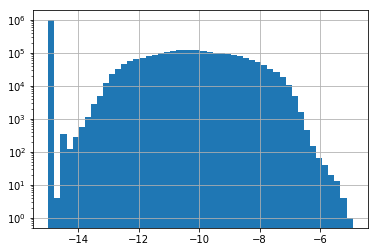

In [113]:
np.log10(np.maximum(-combined_output_data.iloc[:, 0], 1e-15)).hist(bins=50)
plt.gca().set_yscale("log")

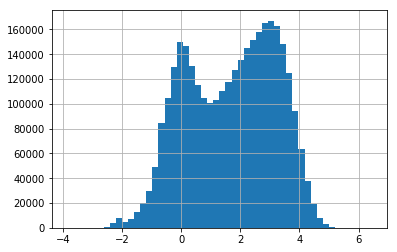

In [36]:
np.log10(np.maximum(-combined_output_data.iloc[:, 2], 1e-15)).hist(bins=50)

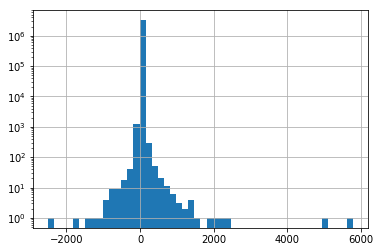

In [40]:
combined_output_data.iloc[:,3].hist(bins=50)
plt.gca().set_yscale("log")

In [156]:
test_preds = dnn.predict(scaled_test_input)

In [97]:
test_preds.shape

(2426187, 1)

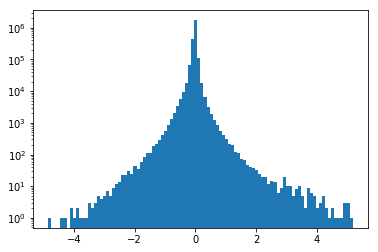

In [157]:
plt.hist(test_preds[:, 0] - np.log10(-test_output_data.iloc[:, 2]), bins=100)
plt.gca().set_yscale("log")

Text(0.5,1,'R2: 0.995')

/glade/u/home/dgagne/miniconda3/envs/deep/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


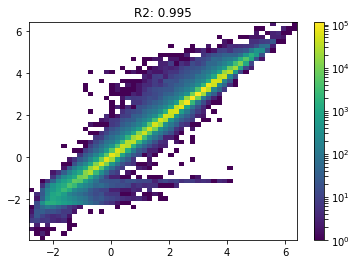

In [165]:
plt.hist2d(test_preds[:, 0], np.log10(-test_output_data.iloc[:, 2]), bins=50, cmin=1, norm=LogNorm())
plt.colorbar()
plt.title("R2: {0:0.3f}".format(r2_score(np.log10(-test_output_data.iloc[:, 2]), test_preds[:, 0])))

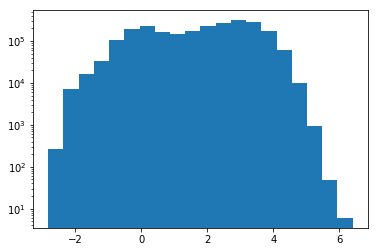

In [158]:
plt.hist(test_preds[:, 0], bins=20)
plt.gca().set_yscale("log")

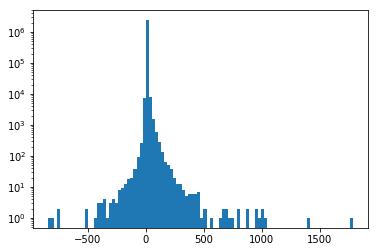

In [120]:
plt.hist(test_output_data.iloc[:, 3], bins=100)
plt.gca().set_yscale("log")

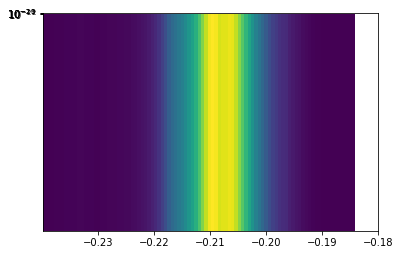

In [69]:
plt.hist2d(test_preds[:, 0], test_output_data.iloc[:, 0], cmin=1, bins=100)

In [79]:
combined_output_data["qrtend_TAU"][combined_output_data["qrtend_TAU"] > 0].min()

1.862227e-15

In [83]:
np.count_nonzero(combined_output_data["nctend_TAU"] == 0)

0

(array([[nan, nan,  1., ..., nan, nan, nan],
        [ 1., nan,  3., ..., nan, nan, nan],
        [ 1.,  1.,  2., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan,  1., nan],
        [nan, nan, nan, ...,  1., nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([-5.99999448, -5.93613816, -5.87228183, -5.8084255 , -5.74456918,
        -5.68071285, -5.61685652, -5.5530002 , -5.48914387, -5.42528754,
        -5.36143122, -5.29757489, -5.23371856, -5.16986224, -5.10600591,
        -5.04214958, -4.97829326, -4.91443693, -4.8505806 , -4.78672428,
        -4.72286795, -4.65901162, -4.5951553 , -4.53129897, -4.46744264,
        -4.40358632, -4.33972999, -4.27587366, -4.21201734, -4.14816101,
        -4.08430468, -4.02044836, -3.95659203, -3.8927357 , -3.82887938,
        -3.76502305, -3.70116672, -3.6373104 , -3.57345407, -3.50959774,
        -3.44574142, -3.38188509, -3.31802876, -3.25417244, -3.19031611,
        -3.12645978, -3.06260346, -2.99874713, -2.9348908 

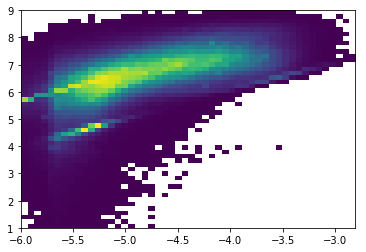

In [124]:
plt.hist2d(combined_input_data.loc[combined_output_data.iloc[:, 1] == 0, "QC_TAU_in"], 
           combined_input_data.loc[combined_output_data.iloc[:, 1] == 0, "NC_TAU_in"], bins=50, cmin=1)

(array([[nan, nan,  1., ..., nan, nan, nan],
        [ 1., nan,  3., ..., nan, nan, nan],
        [ 1.,  1.,  2., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan,  1., nan],
        [nan, nan, nan, ...,  1., nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([-5.99999448, -5.93613816, -5.87228183, -5.8084255 , -5.74456918,
        -5.68071285, -5.61685652, -5.5530002 , -5.48914387, -5.42528754,
        -5.36143122, -5.29757489, -5.23371856, -5.16986224, -5.10600591,
        -5.04214958, -4.97829326, -4.91443693, -4.8505806 , -4.78672428,
        -4.72286795, -4.65901162, -4.5951553 , -4.53129897, -4.46744264,
        -4.40358632, -4.33972999, -4.27587366, -4.21201734, -4.14816101,
        -4.08430468, -4.02044836, -3.95659203, -3.8927357 , -3.82887938,
        -3.76502305, -3.70116672, -3.6373104 , -3.57345407, -3.50959774,
        -3.44574142, -3.38188509, -3.31802876, -3.25417244, -3.19031611,
        -3.12645978, -3.06260346, -2.99874713, -2.9348908 

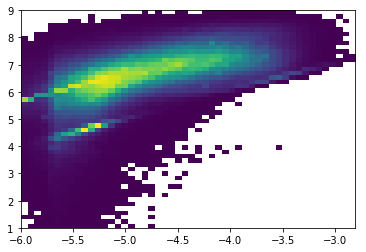

In [147]:
plt.hist2d(combined_input_data.loc[combined_output_data.iloc[:, 3] == 0, "QC_TAU_in"], 
           combined_input_data.loc[combined_output_data.iloc[:, 3] == 0, "NC_TAU_in"], bins=50, cmin=1)

In [143]:
np.count_nonzero((combined_output_data.iloc[:, 1] == 0) & (combined_output_data.iloc[:, 2] == 0))

0

In [144]:
np.count_nonzero(combined_output_data.iloc[:, 2] == 0)

0